<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используемые числовые признаки: ['debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild']
Используемые категориальные признаки: ['text']

Размер числового датафрейма после удаления пропусков: (10000, 12)


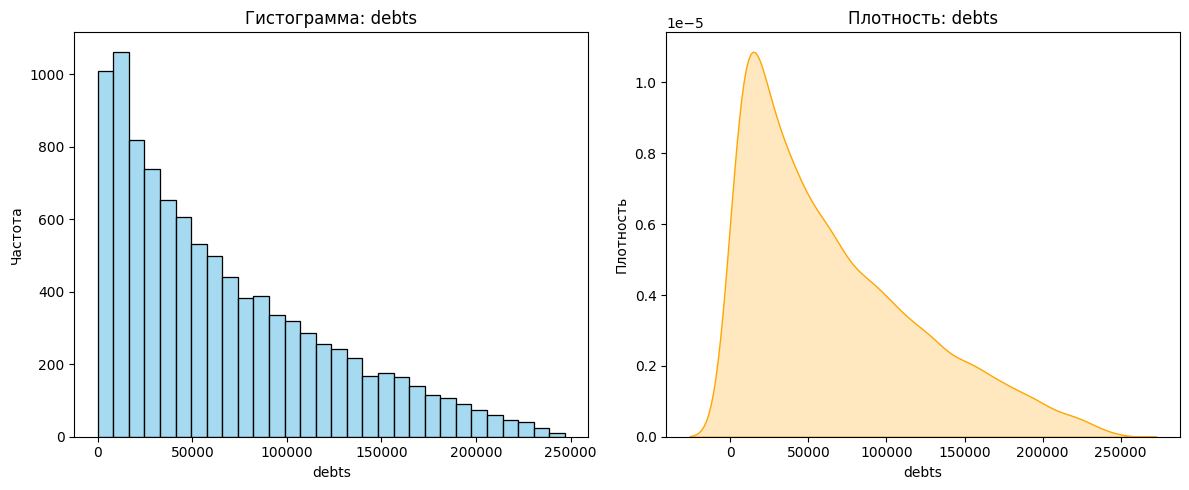

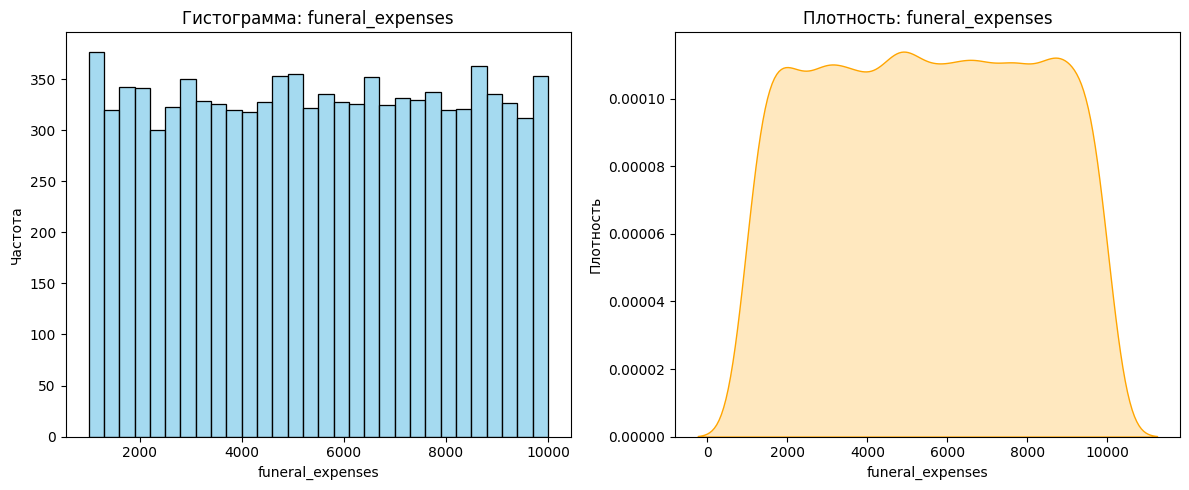

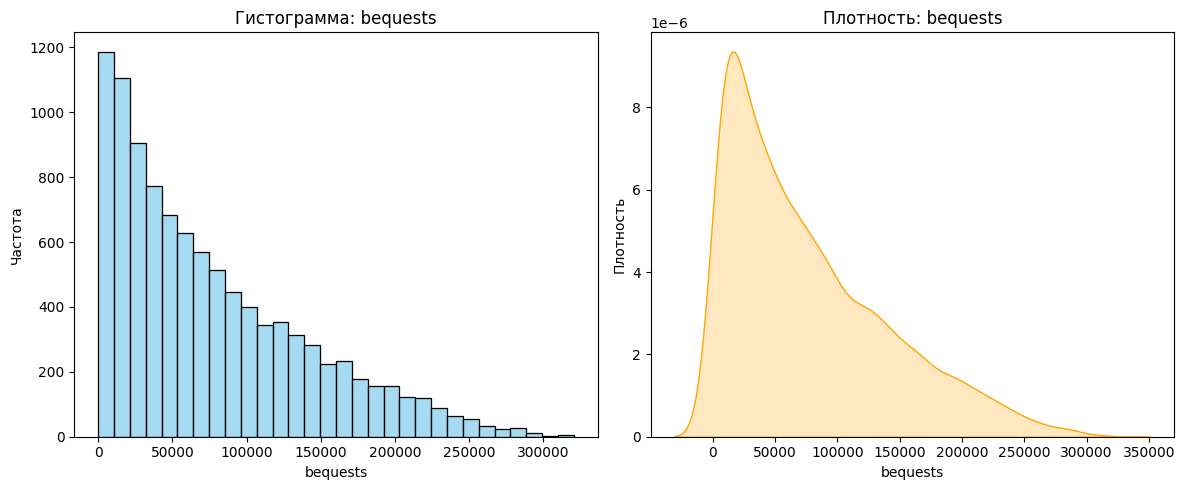

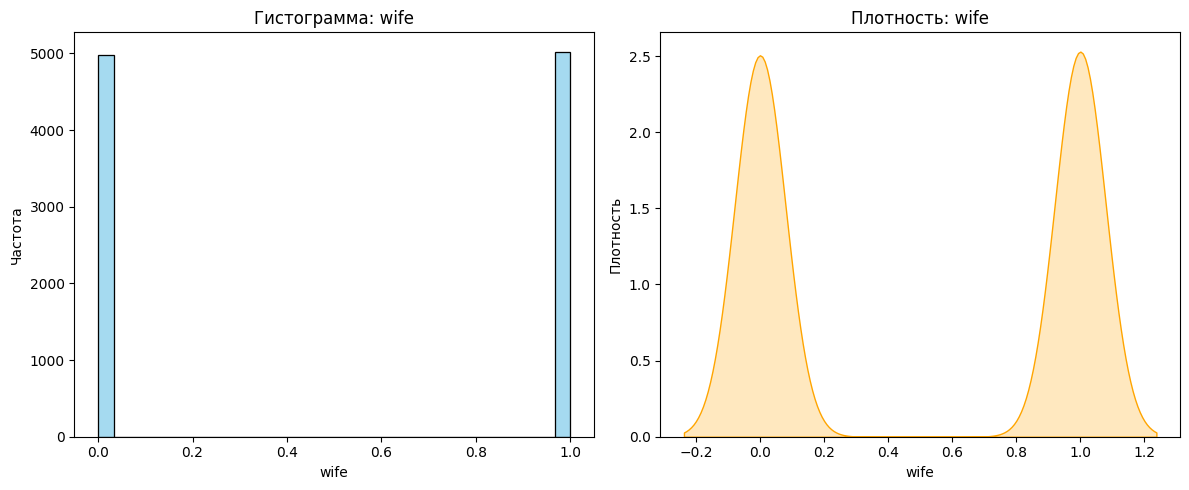

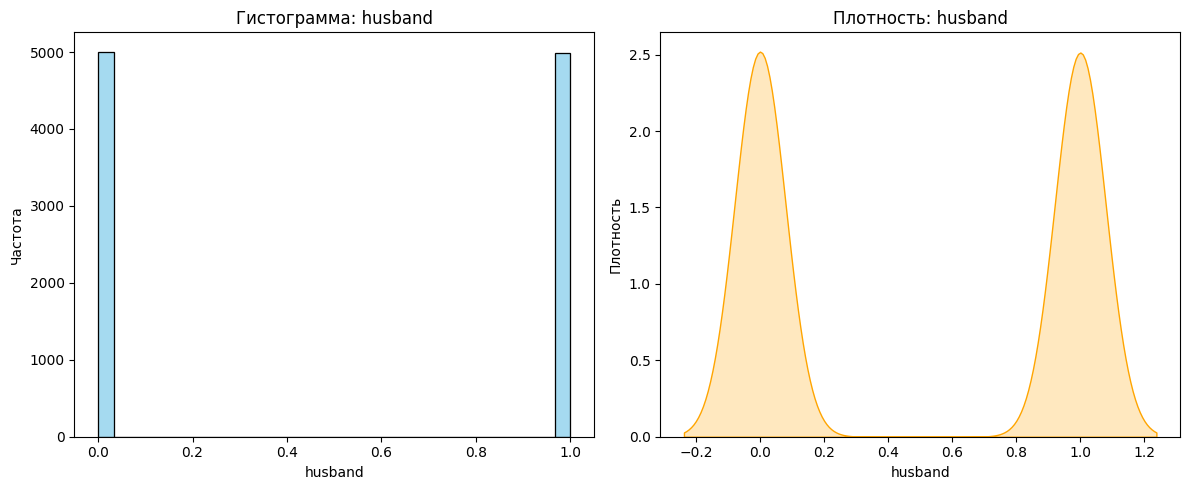

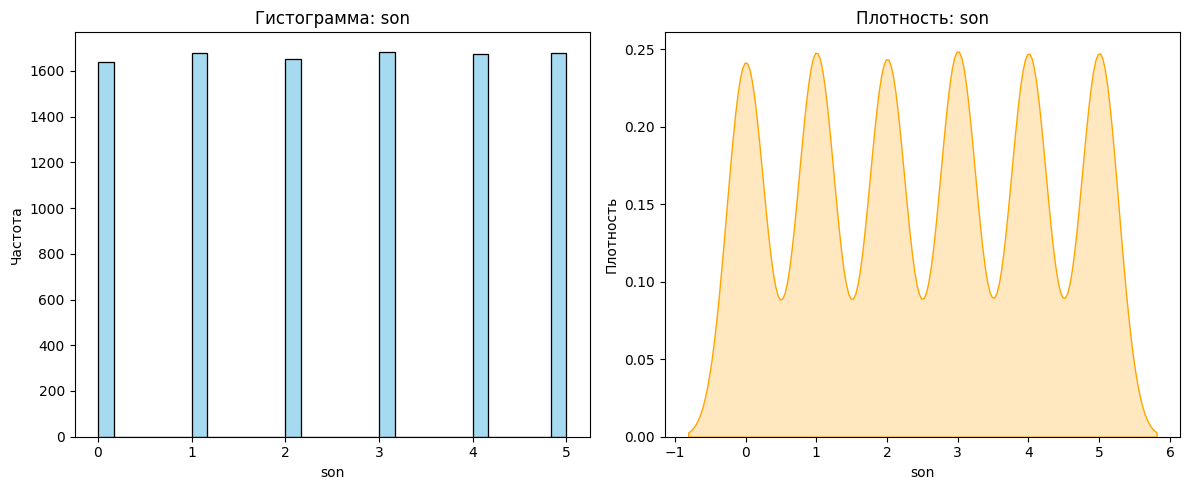

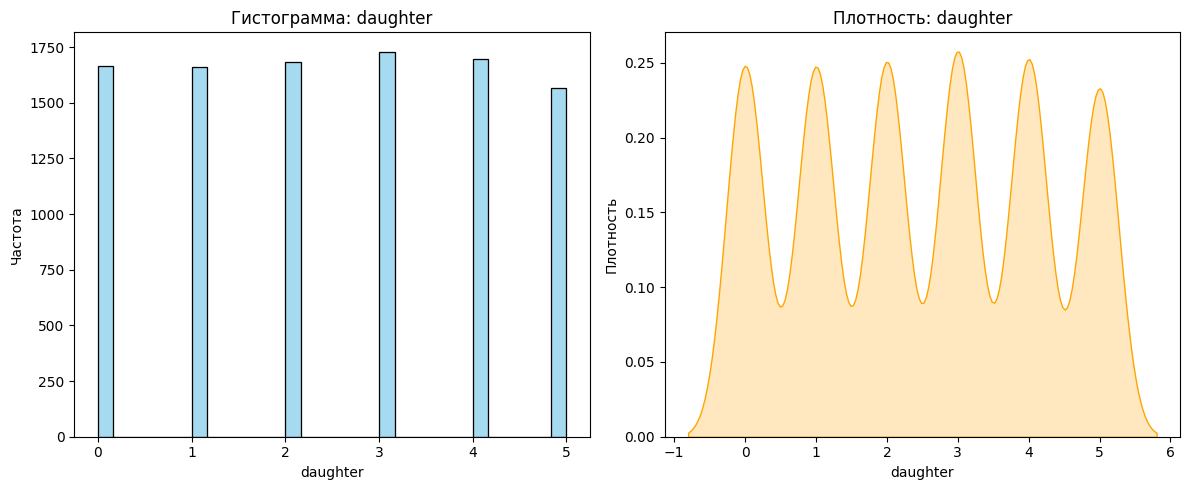

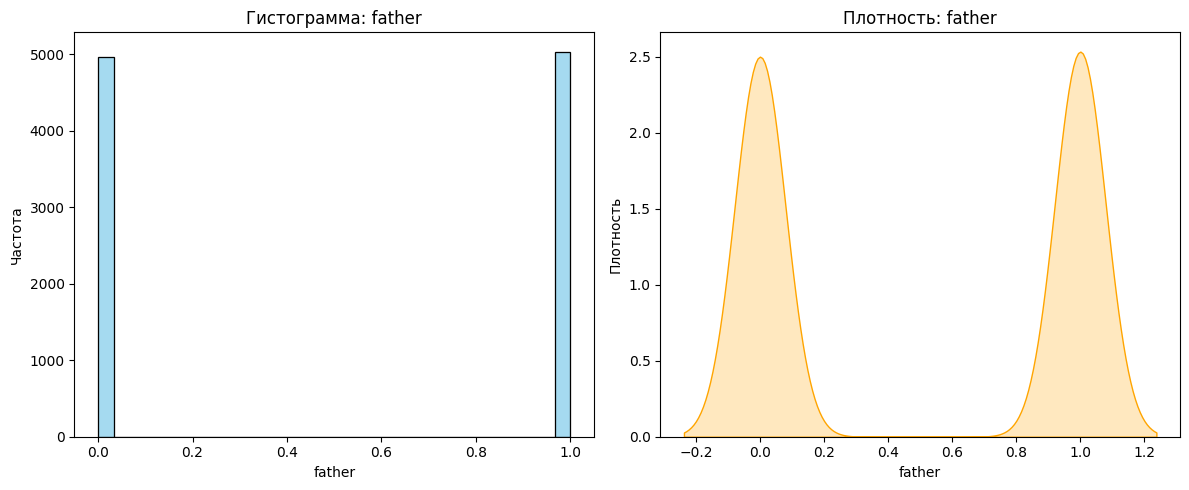

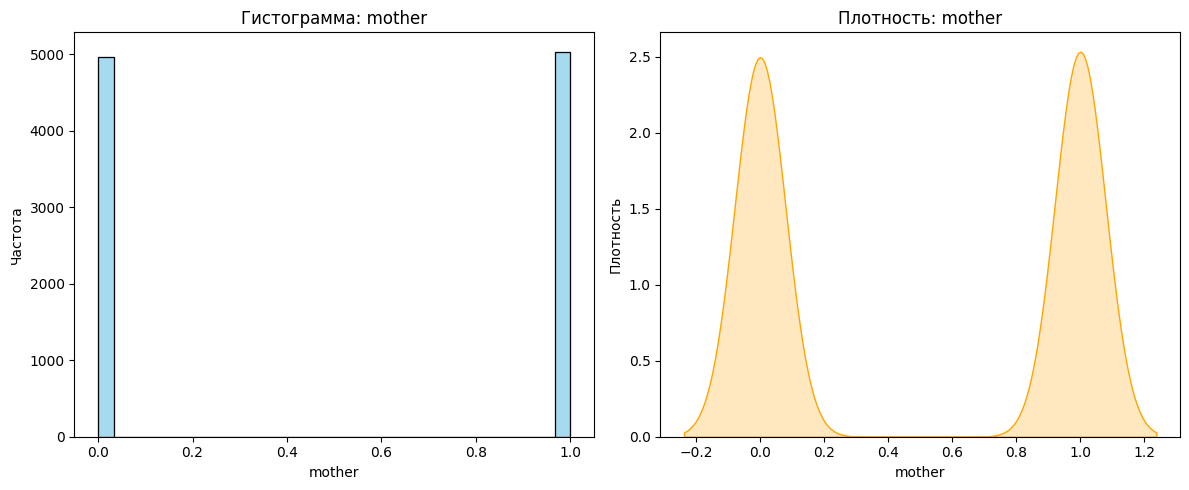

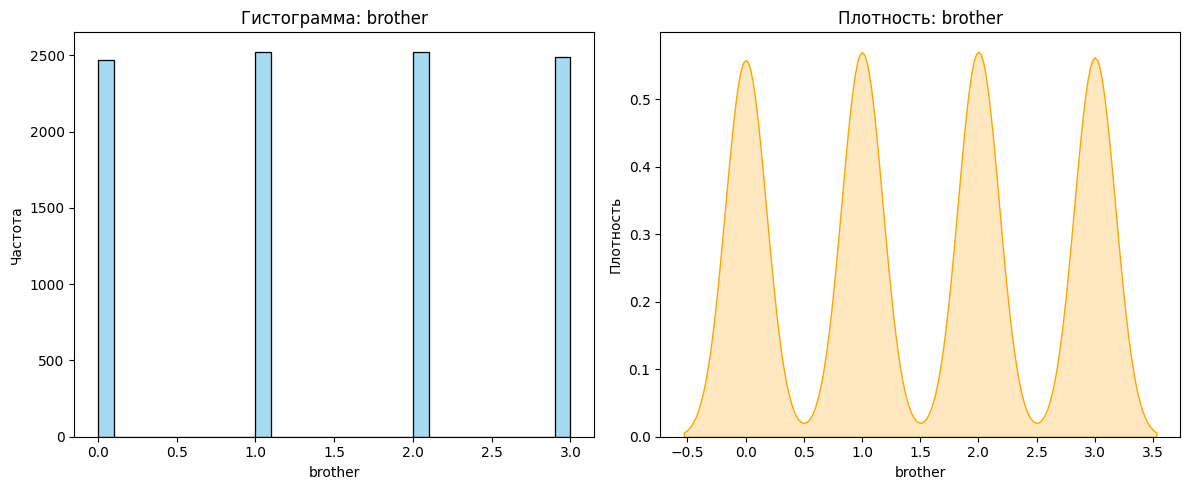

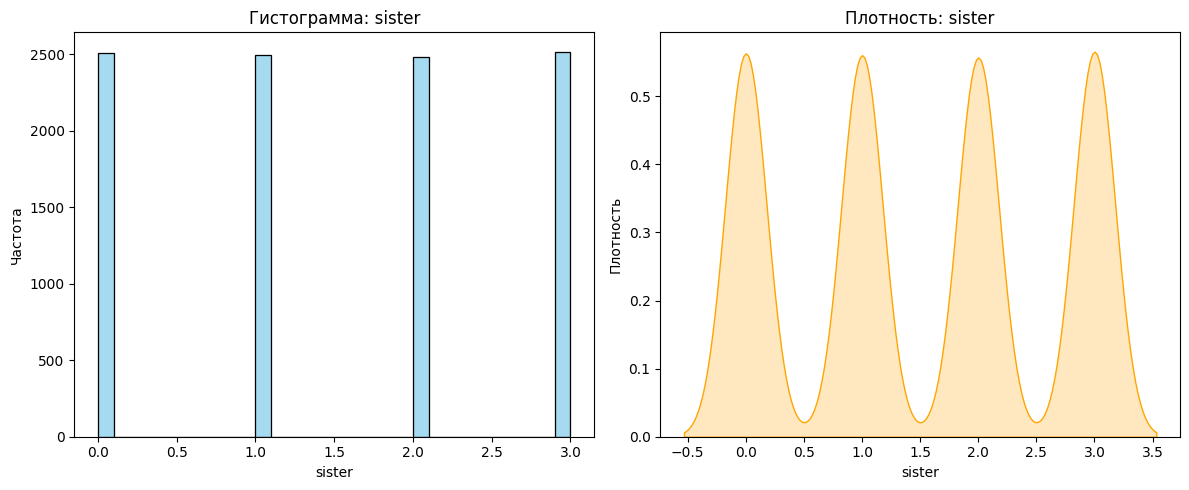

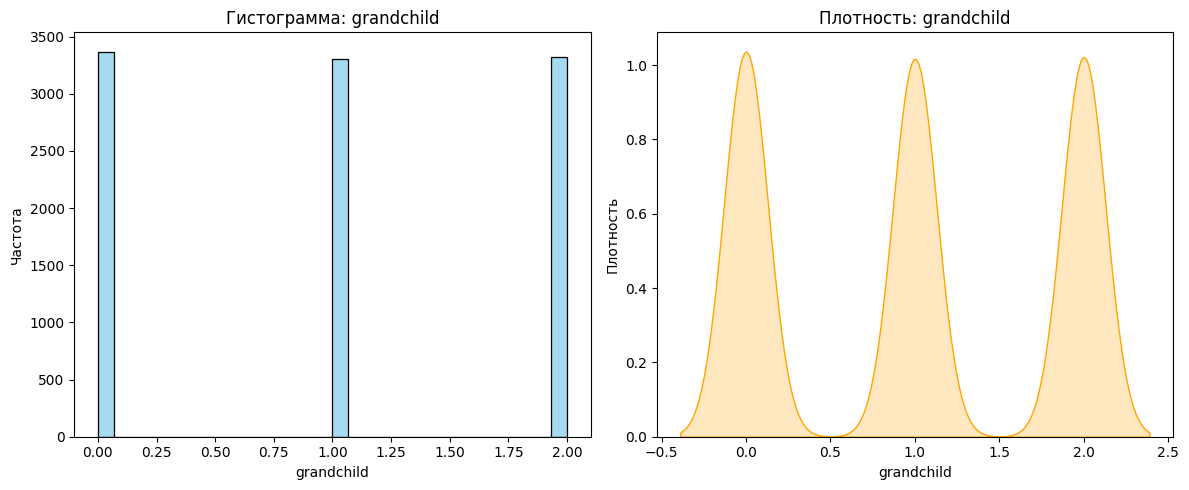

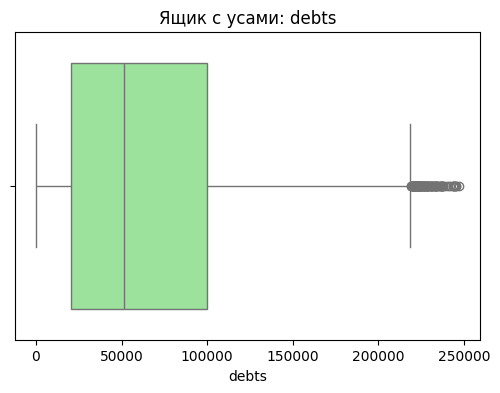

Признак 'debts': 97 выбросов из 10000 наблюдений


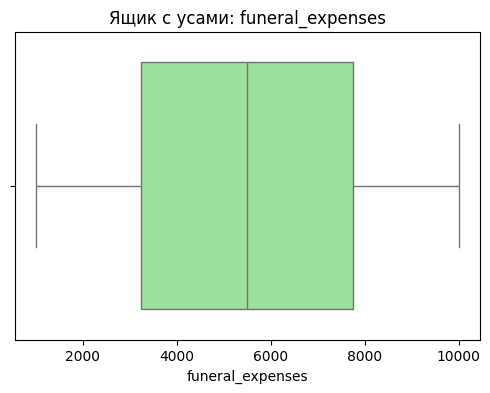

Признак 'funeral_expenses': 0 выбросов из 10000 наблюдений


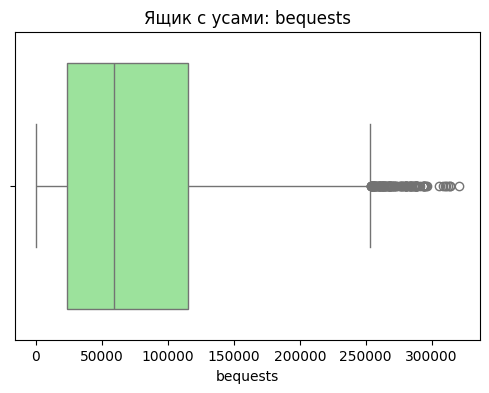

Признак 'bequests': 120 выбросов из 10000 наблюдений


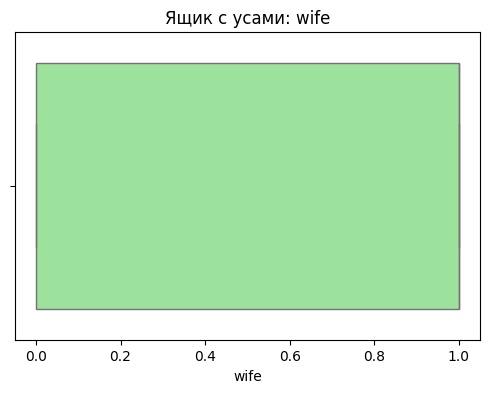

Признак 'wife': 0 выбросов из 10000 наблюдений


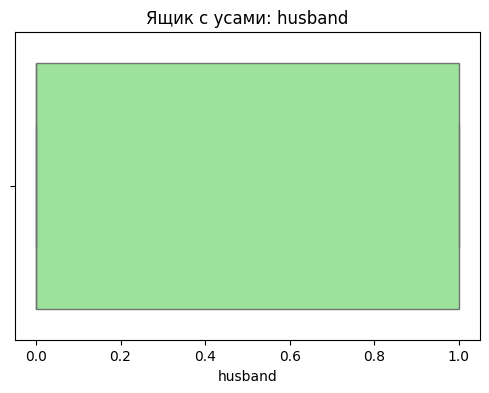

Признак 'husband': 0 выбросов из 10000 наблюдений


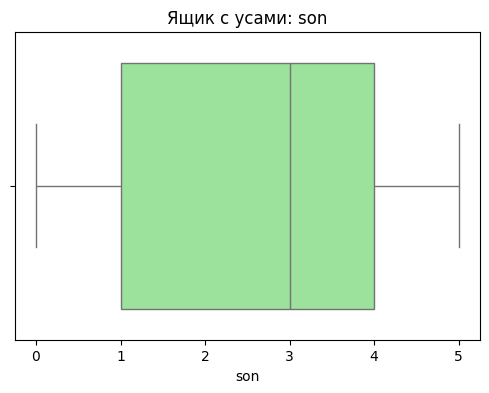

Признак 'son': 0 выбросов из 10000 наблюдений


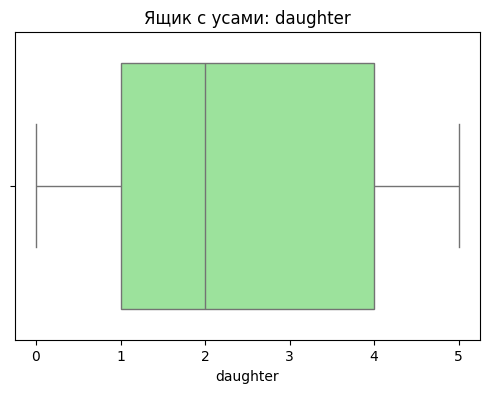

Признак 'daughter': 0 выбросов из 10000 наблюдений


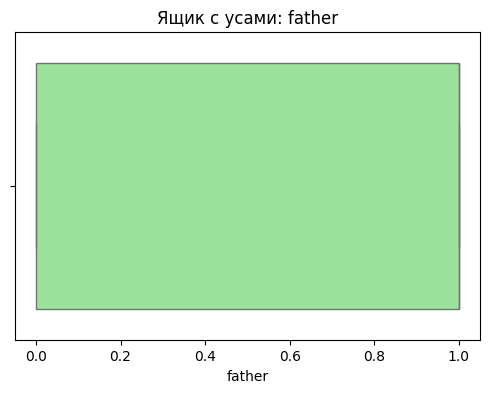

Признак 'father': 0 выбросов из 10000 наблюдений


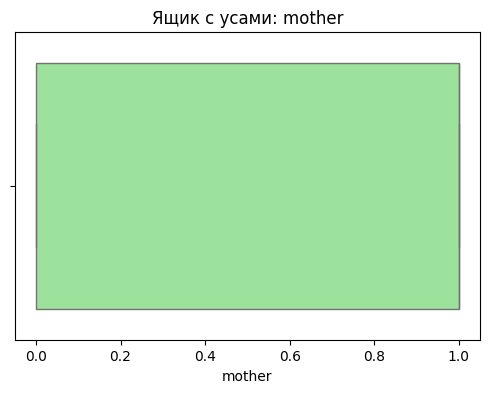

Признак 'mother': 0 выбросов из 10000 наблюдений


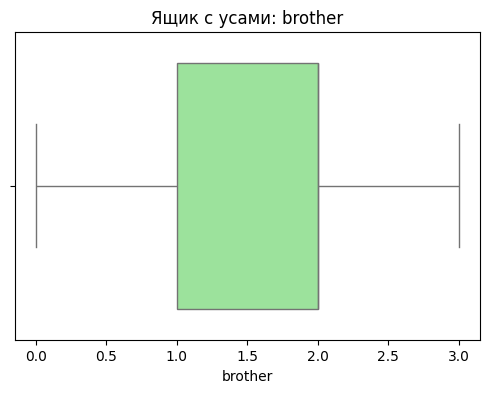

Признак 'brother': 0 выбросов из 10000 наблюдений


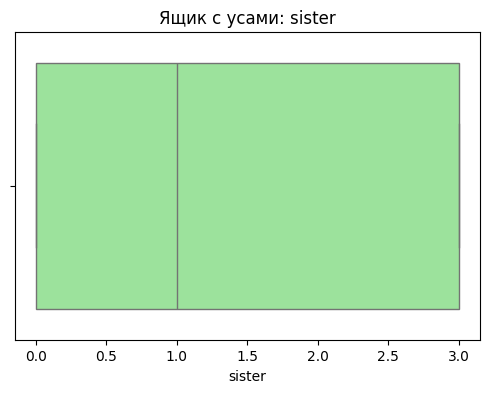

Признак 'sister': 0 выбросов из 10000 наблюдений


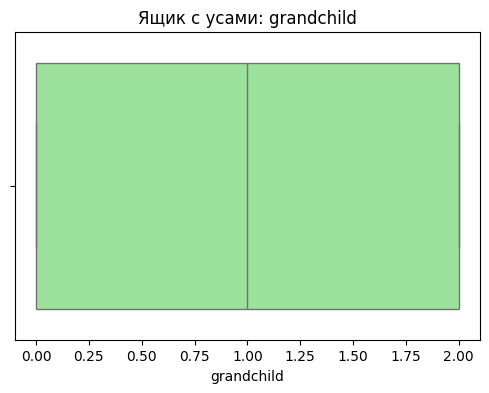

Признак 'grandchild': 0 выбросов из 10000 наблюдений

Примеры текстовых описаний:
0    The estate is worth $801,536.08. There are deb...
1    The estate is worth $943,375.41. There are deb...
2    The estate is worth $678,251.95. There are deb...
3    The estate is worth $364,967.06. There are deb...
4    The estate is worth $663,414.47. There are deb...
Name: text, dtype: object


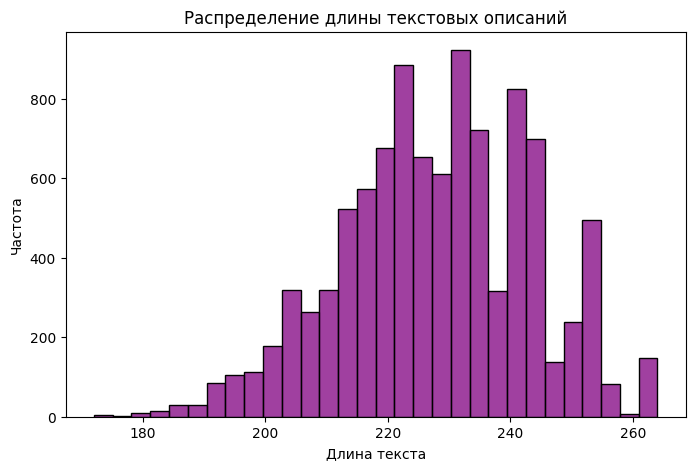


Статистика по длине текста:
count    10000.00000
mean       227.87240
std         15.56332
min        172.00000
25%        217.00000
50%        229.00000
75%        240.00000
max        264.00000
Name: text_length, dtype: float64


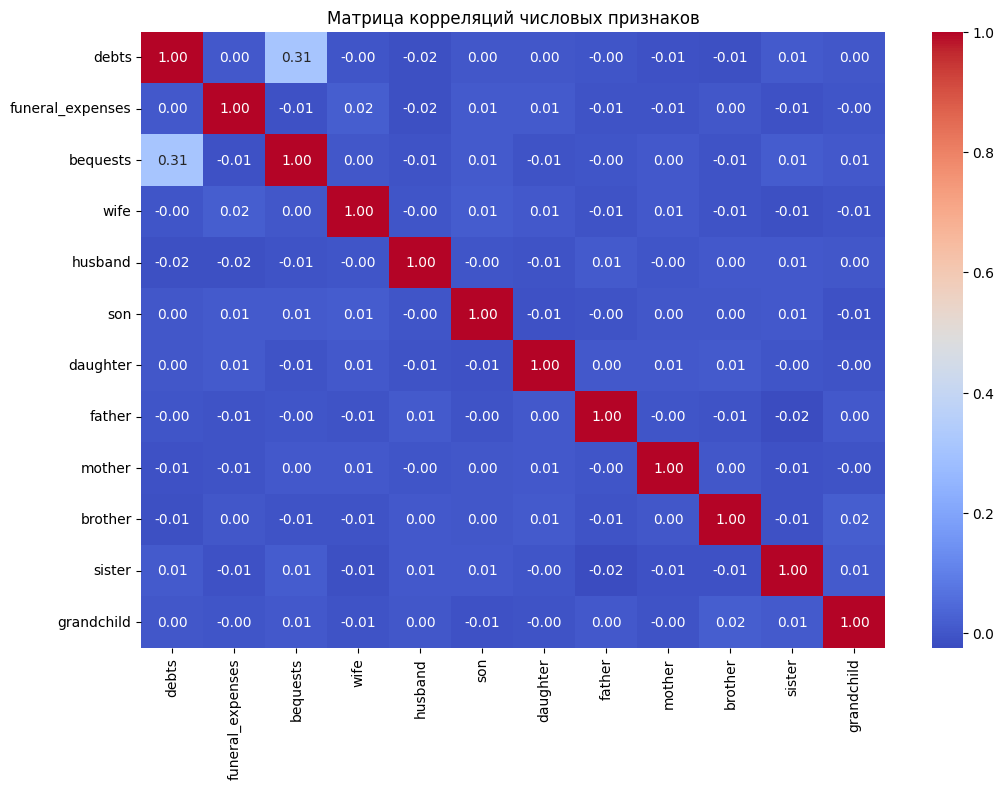


Краткие статистики по числовым признакам:
                debts  funeral_expenses       bequests          wife  \
count   10000.000000      10000.000000   10000.000000  10000.000000   
mean    66114.075550       5494.843407   76554.941016      0.502400   
std     55033.920158       2605.665586   64457.475334      0.500019   
min         2.130000       1000.030000      24.520000      0.000000   
25%     20566.652500       3237.277500   23697.625000      0.000000   
50%     51260.270000       5495.665000   59067.190000      1.000000   
75%     99795.077500       7742.445000  115633.610000      1.000000   
max    246943.130000       9999.530000  320499.220000      1.000000   

            husband          son      daughter        father        mother  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean       0.499400      2.51110      2.482200      0.503300      0.503600   
std        0.500025      1.70557      1.691085      0.500014      0.500012   
min 

In [6]:
# -------------------------------------------------------------- Лабораторная работа №2: Анализ распределений и корреляций

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Load Data ---

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/inheritance_combined.csv"



# --- Feature Lists (adjust if necessary) ---
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]
categorical_features = ['text']

# --- Check for available features ---
existing_numerical = [col for col in numerical_features if col in df.columns]
existing_categorical = [col for col in categorical_features if col in df.columns]

print(f"Используемые числовые признаки: {existing_numerical}")
print(f"Используемые категориальные признаки: {existing_categorical}")

# --- Clean Data ---
df_num = df[existing_numerical].dropna()
print(f"\nРазмер числового датафрейма после удаления пропусков: {df_num.shape}")

# --- Visualize Distributions ---
for feature in existing_numerical:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False, color='skyblue')
    plt.title(f'Гистограмма: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True, color='orange')
    plt.title(f'Плотность: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# --- Boxplots (Outlier Detection) ---
for feature in existing_numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature], color='lightgreen')
    plt.title(f'Ящик с усами: {feature}')
    plt.xlabel(feature)
    plt.show()

    # Outlier summary
    q1 = df_num[feature].quantile(0.25)
    q3 = df_num[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = df_num[(df_num[feature] < q1 - 1.5 * iqr) | (df_num[feature] > q3 + 1.5 * iqr)]
    print(f"Признак '{feature}': {len(outliers)} выбросов из {len(df_num)} наблюдений")

# --- Text Feature Analysis ---
if 'text' in df.columns:
    print("\nПримеры текстовых описаний:")
    print(df['text'].head(5))

    df['text_length'] = df['text'].astype(str).apply(len)
    plt.figure(figsize=(8,5))
    sns.histplot(df['text_length'], bins=30, color='purple')
    plt.title('Распределение длины текстовых описаний')
    plt.xlabel('Длина текста')
    plt.ylabel('Частота')
    plt.show()

    print("\nСтатистика по длине текста:")
    print(df['text_length'].describe())

# --- Correlation Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Summary Statistics ---
print("\nКраткие статистики по числовым признакам:\n", df_num.describe())

# --- Pairplot for deeper analysis (optional, can be slow for large datasets) ---
if len(existing_numerical) <= 6:  # Limit to avoid heavy plots
    sns.pairplot(df_num)
    plt.suptitle("Парные графики для числовых признаков", y=1.02)
    plt.show()

# --- Example Insights ---
print("\nПример анализа:")
print("- Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.")
print("- Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.")
print("- Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.")
